# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sqlalchemy import create_engine
from datetime import date
from scipy.stats import stats

# MYSQL Connection

In [3]:
# ✅ MySQL Database Connection
MYSQL_USER = "root"
MYSQL_PASSWORD = "%40Yashi123**" 
MYSQL_HOST = "localhost"
MYSQL_PORT = "3306"
MYSQL_DATABASE = "bank_data"

# ✅ Create MySQL Connection
try:
    engine = create_engine(f"mysql+mysqlconnector://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DATABASE}")
    print("✅ MySQL Connection Successful")
except Exception as e:
    print(f"❌ MySQL Connection Failed: {e}")


✅ MySQL Connection Successful


# Loading Files

In [84]:
customers = pd.read_sql("select * from customers",engine)
employees = pd.read_sql("select * from employees",engine)
branches = pd.read_sql("select * from branches",engine)
transactions = pd.read_sql("select * from transactions",engine)
accounts = pd.read_sql("select * from accounts",engine)


# Data Cleaning

In [85]:
transactions["transaction_date"] = pd.to_datetime(transactions["transaction_date"])

In [86]:
customers["date_of_birth"] = pd.to_datetime(customers["date_of_birth"])

In [10]:
customers

,customer_id,full_name,date_of_birth,email,contact,address,city,state,zip_code,created_at,age
0,1,Raghav Warrior,1956-11-21,raghav.warrior@gmail.com,9354608027,202 Nehru Place,Aligarh,Uttar Pradesh,202001,2020-11-11 04:37:00,68
1,2,Jhanvi Khalsa,1969-12-30,jhanvi.khalsa@gmail.com,7476061100,123 MG Road,Ahmednagar,Maharashtra,414001,2024-01-19 06:44:26,55
2,3,Manikya Sharma,1969-05-01,manikya.sharma@gmail.com,9281950529,202 Nehru Place,Aligarh,Uttar Pradesh,202001,2022-03-09 12:10:47,55
3,4,Vanya Khatri,1945-08-11,vanya.khatri@gmail.com,8061722326,707 Brigade Road,Bengaluru,Karnataka,560001,2023-06-23 13:19:55,79
4,5,Ojas Sawhney,1984-12-12,ojas.sawhney@gmail.com,7969970952,303 Banjara Hills,Hyderabad,Telangana,500034,2019-07-14 00:52:52,40
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Ritvik Mann,1964-02-24,ritvik.mann@gmail.com,6243287463,789 Anna Salai,Tirunelveli,Tamil Nadu,627001,2020-03-17 19:01:57,61
96,97,Anahi Char,1982-11-05,anahi.char@gmail.com,9181129186,707 Brigade Road,Bengaluru,Karnataka,560001,2023-12-07 11:31:54,42
97,98,Hridaan Bajaj,1974-01-01,hridaan.bajaj@gmail.com,6902316851,101 Residency Road,Mysuru,Karnataka,570001,2020-01-26 23:30:13,51
98,99,Shalv Borde,1951-08-29,shalv.borde@gmail.com,7345388035,606 Juhu Beach,Mumbai,Maharashtra,400049,2019-10-31 15:37:04,73


In [5]:
accounts

,account_number,customer_id,account_type,balance,branch_id,created_at
0,1047867634,37,OverDraft,8531.99,22,2024-05-28 01:35:31
1,1049589837,19,Current,8151.58,26,2023-09-17 07:23:15
2,1192971011,93,Current,4854.60,29,2021-09-16 08:44:48
3,1171583200,79,Salary,7213.44,34,2021-11-04 19:23:52
4,1124194030,31,Savings,4404.55,10,2021-09-05 02:14:47
...,...,...,...,...,...,...
190,1087971950,69,OverDraft,4584.25,16,2020-05-04 22:07:00
191,1143594583,34,Current,1822.20,26,2021-04-17 01:37:56
192,1170542404,14,Current,4471.80,30,2023-07-17 20:18:46
193,1174233024,89,Salary,2632.64,28,2021-06-12 09:32:38


In [6]:
employees

,employee_id,first_name,last_name,email,phone,hire_date,position,branch_id
0,1,Madhup,Bala,madhup.bala@kmb.com,9573010477,2019-12-26 06:35:59,Loan Officer,20
1,2,Anya,Andra,anya.andra@kmb.com,7636178892,2022-02-25 03:39:10,Clerk,15
2,3,Shamik,Basu,shamik.basu@indus.com,7156299036,2021-08-23 05:17:59,Cashier,13
3,4,Siya,Wadhwa,siya.wadhwa@bob.com,7204804470,2021-02-06 14:36:54,Cashier,1
4,5,Shray,Dave,shray.dave@indus.com,9496883514,2023-08-31 06:46:25,Cashier,22
...,...,...,...,...,...,...,...,...
94,95,Lakshay,Ahuja,lakshay.ahuja@axis.com,8393799734,2023-09-07 19:36:43,Loan Officer,24
95,96,Lagan,Rama,lagan.rama@indus.com,8883460177,2020-09-23 07:29:49,Loan Officer,22
96,97,Vritika,Sen,vritika.sen@sbi.com,7520564858,2019-11-02 13:25:18,Loan Officer,7
97,98,Khushi,Varma,khushi.varma@kmb.com,7370247138,2022-09-21 08:51:55,Cashier,15


In [11]:
transactions

,transaction_id,account_number,transaction_type,amount,transaction_date
0,1,1036932307,Deposit,302.10,2022-11-28 08:58:34
1,2,1149164945,Withdrawal,3000.00,2023-06-02 08:10:25
2,3,1036932307,Transfer,3245.28,2024-04-09 10:02:08
3,4,1023672566,Deposit,4518.23,2023-02-10 04:35:42
4,5,1179827631,Transfer,2770.18,2023-11-04 03:20:40
...,...,...,...,...,...
2003,2001,1048635902,Withdrawal,16979.67,2024-05-29 18:47:03
2004,2001,1048635902,Withdrawal,11206.69,2023-09-18 15:05:17
2005,2001,1138527351,Withdrawal,14935.44,2024-05-08 09:23:43
2006,2001,1155452037,Withdrawal,14014.94,2023-07-19 15:29:22


# Merging relationship

In [87]:
df_accounts_full = pd.merge(accounts, branches, on='branch_id', how='left')

In [88]:
df_employees_full = pd.merge(employees, branches, on='branch_id', how='left')

In [89]:
df_accounts_full = pd.merge(df_accounts_full, customers, on='customer_id', how='left')

In [90]:
df_full = pd.merge(transactions, df_accounts_full, on='account_number', how='left')


In [91]:
df_full

,transaction_id,account_number,transaction_type,amount,transaction_date,customer_id,account_type,balance,branch_id,created_at_x,...,full_name,date_of_birth,email,contact,address,city_y,state_y,zip_code_y,created_at_y,age
0,1,1036932307,Deposit,302.10,2022-11-28 08:58:34,25,Current,4588.59,27,2021-10-05 21:21:17,...,Taimur Jayaraman,1949-06-21,taimur.jayaraman@yahoo.com,9735058453,456 Park Street,Nanded,Maharashtra,431601,2020-07-20 12:51:19,75
1,2,1149164945,Withdrawal,3000.00,2023-06-02 08:10:25,12,OverDraft,5536.71,5,2022-10-07 17:51:06,...,Lakshay Kurian,1974-08-14,lakshay.kurian@gmail.com,9735520500,404 Connaught Place,New Delhi,Delhi,110001,2024-02-01 15:13:50,50
2,3,1036932307,Transfer,3245.28,2024-04-09 10:02:08,25,Current,4588.59,27,2021-10-05 21:21:17,...,Taimur Jayaraman,1949-06-21,taimur.jayaraman@yahoo.com,9735058453,456 Park Street,Nanded,Maharashtra,431601,2020-07-20 12:51:19,75
3,4,1023672566,Deposit,4518.23,2023-02-10 04:35:42,34,OverDraft,7007.72,19,2022-05-17 10:39:09,...,Dishani Deol,1993-02-06,dishani.deol@gmail.com,6727335349,123 MG Road,Ahmednagar,Maharashtra,414001,2019-07-15 20:57:51,32
4,5,1179827631,Transfer,2770.18,2023-11-04 03:20:40,66,Savings,7470.16,24,2022-02-17 05:47:14,...,Hrishita Chopra,1999-11-10,hrishita.chopra@gmail.com,6958007568,456 Park Street,Nanded,Maharashtra,431601,2020-09-26 07:56:36,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,2001,1048635902,Withdrawal,16979.67,2024-05-29 18:47:03,53,Salary,6685.75,5,2023-11-02 20:19:59,...,Ira Sur,1959-08-08,ira.sur@gmail.com,9520049737,303 Banjara Hills,Hyderabad,Telangana,500034,2022-12-17 12:23:12,65
2004,2001,1048635902,Withdrawal,11206.69,2023-09-18 15:05:17,53,Salary,6685.75,5,2023-11-02 20:19:59,...,Ira Sur,1959-08-08,ira.sur@gmail.com,9520049737,303 Banjara Hills,Hyderabad,Telangana,500034,2022-12-17 12:23:12,65
2005,2001,1138527351,Withdrawal,14935.44,2024-05-08 09:23:43,5,OverDraft,9633.62,34,2020-08-16 01:30:30,...,Ojas Sawhney,1984-12-12,ojas.sawhney@gmail.com,7969970952,303 Banjara Hills,Hyderabad,Telangana,500034,2019-07-14 00:52:52,40
2006,2001,1155452037,Withdrawal,14014.94,2023-07-19 15:29:22,43,OverDraft,3992.72,13,2020-08-05 23:03:33,...,Arhaan Chanda,1964-07-15,arhaan.chanda@gmail.com,7942154325,404 Connaught Place,New Delhi,Delhi,110001,2020-12-04 17:09:20,60


# Feature Engineering

In [92]:
df_full['transaction_hour'] = df_full['transaction_date'].dt.hour


In [93]:
df_full['month'] = df_full['transaction_date'].dt.to_period('M').astype(str)


In [51]:
df_full

,transaction_id,account_number,transaction_type,amount,transaction_date,customer_id,account_type,balance,branch_id,created_at_x,...,date_of_birth,email,contact,address,city_y,state_y,zip_code_y,created_at_y,age,month
0,1,1036932307,Deposit,302.10,2022-11-28 08:58:34,25,Current,4588.59,27,2021-10-05 21:21:17,...,1949-06-21,taimur.jayaraman@yahoo.com,9735058453,456 Park Street,Nanded,Maharashtra,431601,2020-07-20 12:51:19,75,2022-11
1,2,1149164945,Withdrawal,3000.00,2023-06-02 08:10:25,12,OverDraft,5536.71,5,2022-10-07 17:51:06,...,1974-08-14,lakshay.kurian@gmail.com,9735520500,404 Connaught Place,New Delhi,Delhi,110001,2024-02-01 15:13:50,50,2023-06
2,3,1036932307,Transfer,3245.28,2024-04-09 10:02:08,25,Current,4588.59,27,2021-10-05 21:21:17,...,1949-06-21,taimur.jayaraman@yahoo.com,9735058453,456 Park Street,Nanded,Maharashtra,431601,2020-07-20 12:51:19,75,2024-04
3,4,1023672566,Deposit,4518.23,2023-02-10 04:35:42,34,OverDraft,7007.72,19,2022-05-17 10:39:09,...,1993-02-06,dishani.deol@gmail.com,6727335349,123 MG Road,Ahmednagar,Maharashtra,414001,2019-07-15 20:57:51,32,2023-02
4,5,1179827631,Transfer,2770.18,2023-11-04 03:20:40,66,Savings,7470.16,24,2022-02-17 05:47:14,...,1999-11-10,hrishita.chopra@gmail.com,6958007568,456 Park Street,Nanded,Maharashtra,431601,2020-09-26 07:56:36,25,2023-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,2001,1048635902,Withdrawal,16979.67,2024-05-29 18:47:03,53,Salary,6685.75,5,2023-11-02 20:19:59,...,1959-08-08,ira.sur@gmail.com,9520049737,303 Banjara Hills,Hyderabad,Telangana,500034,2022-12-17 12:23:12,65,2024-05
2004,2001,1048635902,Withdrawal,11206.69,2023-09-18 15:05:17,53,Salary,6685.75,5,2023-11-02 20:19:59,...,1959-08-08,ira.sur@gmail.com,9520049737,303 Banjara Hills,Hyderabad,Telangana,500034,2022-12-17 12:23:12,65,2023-09
2005,2001,1138527351,Withdrawal,14935.44,2024-05-08 09:23:43,5,OverDraft,9633.62,34,2020-08-16 01:30:30,...,1984-12-12,ojas.sawhney@gmail.com,7969970952,303 Banjara Hills,Hyderabad,Telangana,500034,2019-07-14 00:52:52,40,2024-05
2006,2001,1155452037,Withdrawal,14014.94,2023-07-19 15:29:22,43,OverDraft,3992.72,13,2020-08-05 23:03:33,...,1964-07-15,arhaan.chanda@gmail.com,7942154325,404 Connaught Place,New Delhi,Delhi,110001,2020-12-04 17:09:20,60,2023-07


In [94]:
def get_time_category(hour):
    if 0 <= hour <= 6:
        return 'Late Night'
    elif 7 <= hour <= 12:
        return 'Morning'
    elif 13 <= hour <= 18:
        return 'Afternoon'
    else:
        return 'Evening'

df_full['TimeCategory'] = df_full['transaction_hour'].apply(get_time_category)


In [20]:
df_full

,transaction_id,account_number,transaction_type,amount,transaction_date,customer_id,account_type,balance,branch_id,created_at_x,...,email,contact,address,city_y,state_y,zip_code_y,created_at_y,age,transaction_hour,TimeCategory
0,1,1036932307,Deposit,302.10,2022-11-28 08:58:34,25,Current,4588.59,27,2021-10-05 21:21:17,...,taimur.jayaraman@yahoo.com,9735058453,456 Park Street,Nanded,Maharashtra,431601,2020-07-20 12:51:19,75,8,Morning
1,2,1149164945,Withdrawal,3000.00,2023-06-02 08:10:25,12,OverDraft,5536.71,5,2022-10-07 17:51:06,...,lakshay.kurian@gmail.com,9735520500,404 Connaught Place,New Delhi,Delhi,110001,2024-02-01 15:13:50,50,8,Morning
2,3,1036932307,Transfer,3245.28,2024-04-09 10:02:08,25,Current,4588.59,27,2021-10-05 21:21:17,...,taimur.jayaraman@yahoo.com,9735058453,456 Park Street,Nanded,Maharashtra,431601,2020-07-20 12:51:19,75,10,Morning
3,4,1023672566,Deposit,4518.23,2023-02-10 04:35:42,34,OverDraft,7007.72,19,2022-05-17 10:39:09,...,dishani.deol@gmail.com,6727335349,123 MG Road,Ahmednagar,Maharashtra,414001,2019-07-15 20:57:51,32,4,Late Night
4,5,1179827631,Transfer,2770.18,2023-11-04 03:20:40,66,Savings,7470.16,24,2022-02-17 05:47:14,...,hrishita.chopra@gmail.com,6958007568,456 Park Street,Nanded,Maharashtra,431601,2020-09-26 07:56:36,25,3,Late Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,2001,1048635902,Withdrawal,16979.67,2024-05-29 18:47:03,53,Salary,6685.75,5,2023-11-02 20:19:59,...,ira.sur@gmail.com,9520049737,303 Banjara Hills,Hyderabad,Telangana,500034,2022-12-17 12:23:12,65,18,Afternoon
2004,2001,1048635902,Withdrawal,11206.69,2023-09-18 15:05:17,53,Salary,6685.75,5,2023-11-02 20:19:59,...,ira.sur@gmail.com,9520049737,303 Banjara Hills,Hyderabad,Telangana,500034,2022-12-17 12:23:12,65,15,Afternoon
2005,2001,1138527351,Withdrawal,14935.44,2024-05-08 09:23:43,5,OverDraft,9633.62,34,2020-08-16 01:30:30,...,ojas.sawhney@gmail.com,7969970952,303 Banjara Hills,Hyderabad,Telangana,500034,2019-07-14 00:52:52,40,9,Morning
2006,2001,1155452037,Withdrawal,14014.94,2023-07-19 15:29:22,43,OverDraft,3992.72,13,2020-08-05 23:03:33,...,arhaan.chanda@gmail.com,7942154325,404 Connaught Place,New Delhi,Delhi,110001,2020-12-04 17:09:20,60,15,Afternoon


In [95]:
def get_age_group(age):
    if pd.isnull(age):
        return None
    elif age < 18:
        return "Under 18"
    elif 18 <= age < 25:
        return "18 - 24"
    elif 25 <= age < 35:
        return "25 - 34"
    elif 35 <= age < 45:
        return "35 - 44"
    elif 45 <= age < 55:
        return "45 - 54"
    elif 55 <= age < 65:
        return "55 - 64"
    elif 65 <= age < 75:
        return "65 - 74"
    else:
        return "75 and above"

df_full['Age_Group'] = df_full['age'].apply(get_age_group)


In [96]:
df_full['DayOfWeek'] = df_full['transaction_date'].dt.weekday  

df_full['WeekCategory'] = df_full['DayOfWeek'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

In [26]:
df_full

,transaction_id,account_number,transaction_type,amount,transaction_date,customer_id,account_type,balance,branch_id,created_at_x,...,city_y,state_y,zip_code_y,created_at_y,age,transaction_hour,TimeCategory,Age_Group,DayOfWeek,WeekCategory
0,1,1036932307,Deposit,302.10,2022-11-28 08:58:34,25,Current,4588.59,27,2021-10-05 21:21:17,...,Nanded,Maharashtra,431601,2020-07-20 12:51:19,75,8,Morning,75 and above,0,Weekday
1,2,1149164945,Withdrawal,3000.00,2023-06-02 08:10:25,12,OverDraft,5536.71,5,2022-10-07 17:51:06,...,New Delhi,Delhi,110001,2024-02-01 15:13:50,50,8,Morning,45 - 54,4,Weekday
2,3,1036932307,Transfer,3245.28,2024-04-09 10:02:08,25,Current,4588.59,27,2021-10-05 21:21:17,...,Nanded,Maharashtra,431601,2020-07-20 12:51:19,75,10,Morning,75 and above,1,Weekday
3,4,1023672566,Deposit,4518.23,2023-02-10 04:35:42,34,OverDraft,7007.72,19,2022-05-17 10:39:09,...,Ahmednagar,Maharashtra,414001,2019-07-15 20:57:51,32,4,Late Night,25 - 34,4,Weekday
4,5,1179827631,Transfer,2770.18,2023-11-04 03:20:40,66,Savings,7470.16,24,2022-02-17 05:47:14,...,Nanded,Maharashtra,431601,2020-09-26 07:56:36,25,3,Late Night,25 - 34,5,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,2001,1048635902,Withdrawal,16979.67,2024-05-29 18:47:03,53,Salary,6685.75,5,2023-11-02 20:19:59,...,Hyderabad,Telangana,500034,2022-12-17 12:23:12,65,18,Afternoon,65 - 74,2,Weekday
2004,2001,1048635902,Withdrawal,11206.69,2023-09-18 15:05:17,53,Salary,6685.75,5,2023-11-02 20:19:59,...,Hyderabad,Telangana,500034,2022-12-17 12:23:12,65,15,Afternoon,65 - 74,0,Weekday
2005,2001,1138527351,Withdrawal,14935.44,2024-05-08 09:23:43,5,OverDraft,9633.62,34,2020-08-16 01:30:30,...,Hyderabad,Telangana,500034,2019-07-14 00:52:52,40,9,Morning,35 - 44,2,Weekday
2006,2001,1155452037,Withdrawal,14014.94,2023-07-19 15:29:22,43,OverDraft,3992.72,13,2020-08-05 23:03:33,...,New Delhi,Delhi,110001,2020-12-04 17:09:20,60,15,Afternoon,55 - 64,2,Weekday


In [27]:
df_full.isnull().sum().sum()

0

# EDA

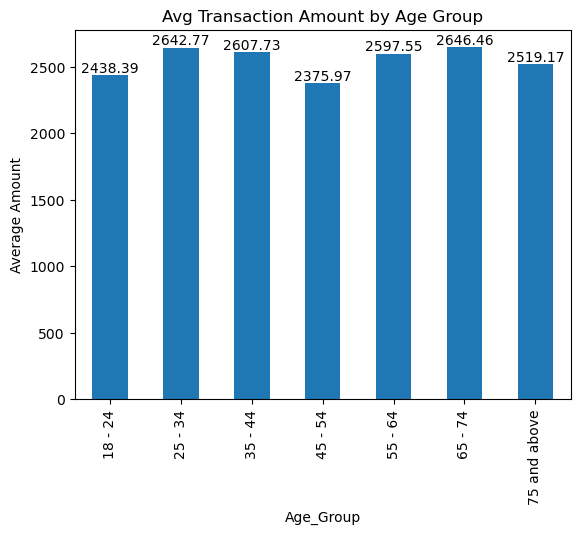

In [20]:
avg_amount = df_full.groupby('Age_Group')['amount'].mean()
df_full.groupby('Age_Group')['amount'].mean().plot(kind='bar', title="Avg Transaction Amount by Age Group")
plt.ylabel("Average Amount")
for i, value in enumerate(avg_amount):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
    
plt.show()

In [113]:
# Amount by Transaction_Type

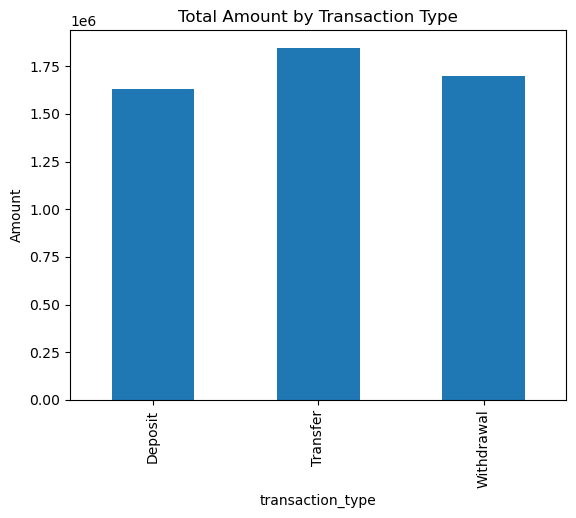

In [30]:
df_full['transaction_type'].value_counts()

# Total amount by type
df_full.groupby('transaction_type')['amount'].sum().plot(kind='bar', title="Total Amount by Transaction Type")
plt.ylabel('Amount')
plt.show()


In [112]:
# TOP 10 Customers

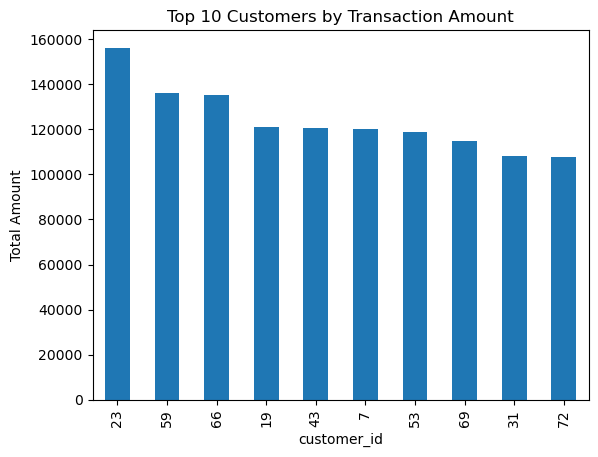

In [31]:
top_customers = df_full.groupby('customer_id')['amount'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Transaction Amount')
plt.ylabel('Total Amount')
plt.show()


In [ ]:
#Rural VS Urban

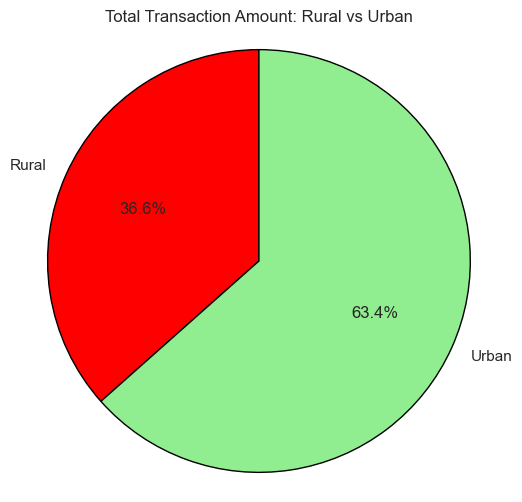

In [111]:
import matplotlib.pyplot as plt

# Total amount by customer location
location_amount = df_full.groupby('branch_location')['amount'].sum()

# Labels and values
labels = location_amount.index
sizes = location_amount.values

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['red', 'lightgreen'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Total Transaction Amount: Rural vs Urban')
plt.axis('equal') 
plt.show()


In [ ]:
# Branch_wise Transactions

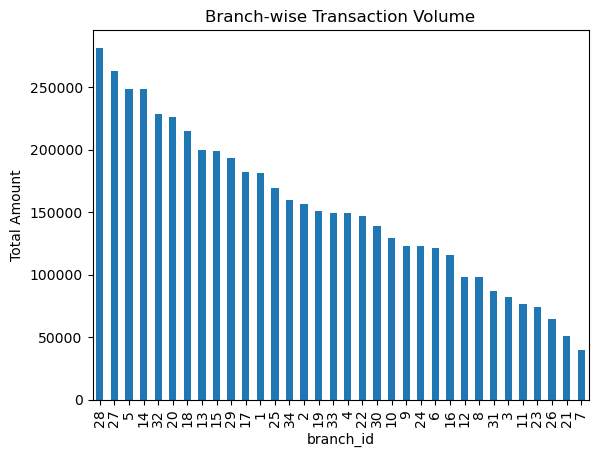

In [32]:
branch_perf = df_full.groupby('branch_id')['amount'].sum().sort_values(ascending=False)
branch_perf.plot(kind='bar', title='Branch-wise Transaction Volume')
plt.ylabel('Total Amount')
plt.show()


In [114]:
#Time Category 

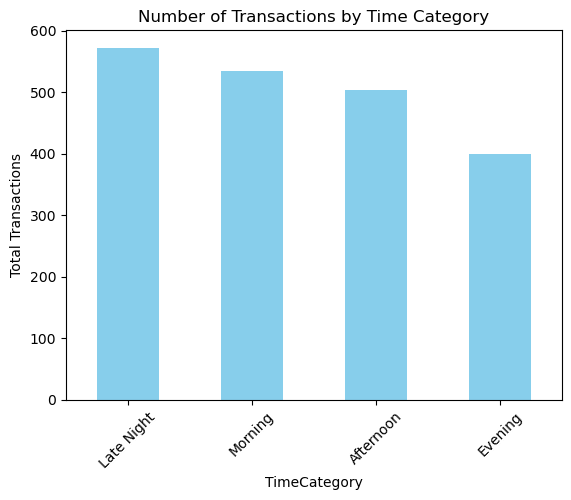

In [36]:
df_full['TimeCategory'].value_counts().plot(kind='bar', title='Number of Transactions by Time Category', color='skyblue')
plt.xlabel('TimeCategory')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)
plt.show()


In [115]:
#Weekly Analysis

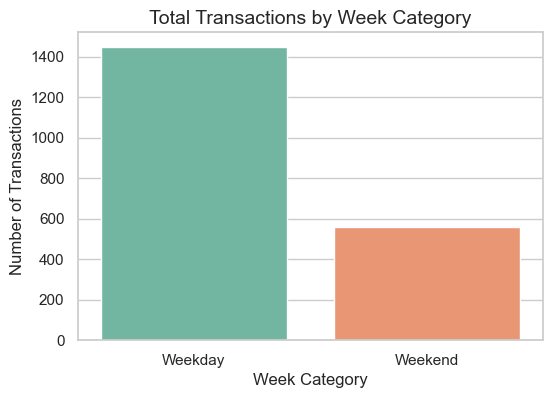

In [38]:
sns.set(style='whitegrid')

# Plot total count of transactions
plt.figure(figsize=(6,4))
sns.countplot(data=df_full, x='WeekCategory', palette='Set2')

plt.title('Total Transactions by Week Category', fontsize=14)
plt.xlabel('Week Category')
plt.ylabel('Number of Transactions')
plt.show()

In [118]:
# monthly Trend(Count)

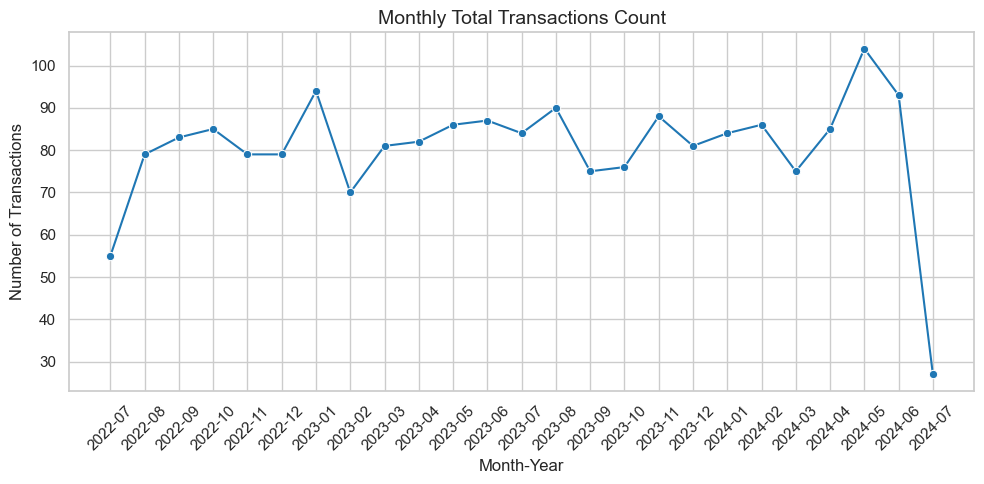

In [52]:
monthly_counts = df_full['month'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o', color='#1f77b4')
plt.title('Monthly Total Transactions Count', fontsize=14)
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [117]:
#Monthly Trend(Amount)

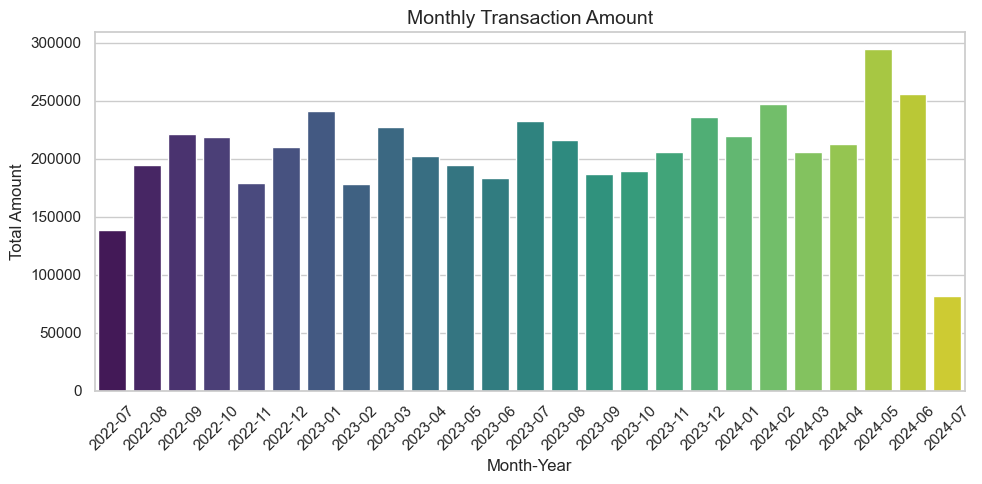

In [54]:
monthly_amount = df_full.groupby('month')['amount'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_amount.index, y=monthly_amount.values, palette='viridis')
plt.title('Monthly Transaction Amount', fontsize=14)
plt.xlabel('Month-Year')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Summary 

In [68]:
def transaction_summary(df, group_col):
    summary = df.groupby(group_col)['amount'].agg(['count', 'sum', 'mean']).reset_index()
    summary.columns = [group_col, 'Total Transactions', 'Total Amount', 'Average Amount']
    return summary



In [72]:
transaction_summary(df_full, 'transaction_type')

,transaction_type,Total Transactions,Total Amount,Average Amount
0,Deposit,654,1629406.50,2491.447248
1,Transfer,728,1846454.27,2536.338283
2,Withdrawal,626,1696110.38,2709.441502


# Top N 

In [77]:
top_branches = df_full.groupby('branch_name')['amount'].sum().sort_values(ascending=False).head(5)
top_customers = df_full.groupby('customer_id')['amount'].sum().sort_values(ascending=False).head(5)
print(top_branches,top_customers)

branch_name
INDUS 11 Silicon Valley    281543.71
HDFC 55 Info Park          262658.46
AXIS 707 Brigade Road      248867.25
CANARA 707 Brigade Road    248701.70
CANARA 606 Juhu Beach      228833.49
Name: amount, dtype: float64 customer_id
23    156127.96
59    135944.56
66    135231.43
19    120831.94
43    120520.22
Name: amount, dtype: float64


In [78]:
top_branches = df_full.groupby('branch_name')['transaction_id'].count().sort_values(ascending=False).head(5)
top_customers = df_full.groupby('customer_id')['transaction_id'].count().sort_values(ascending=False).head(5)
print(top_branches,top_customers)

branch_name
INDUS 11 Silicon Valley    119
HDFC 55 Info Park          108
CANARA 707 Brigade Road     98
KMB 707 Brigade Road        91
CANARA 606 Juhu Beach       80
Name: transaction_id, dtype: int64 customer_id
59    53
23    51
66    50
7     48
31    45
Name: transaction_id, dtype: int64


# Outlier Detection

In [98]:
Q1 = df_full['amount'].quantile(0.25)
Q3 = df_full['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_full[(df_full['amount'] < lower_bound) | (df_full['amount'] > upper_bound)]
print(f"Total outliers: {len(outliers)}")


Total outliers: 8


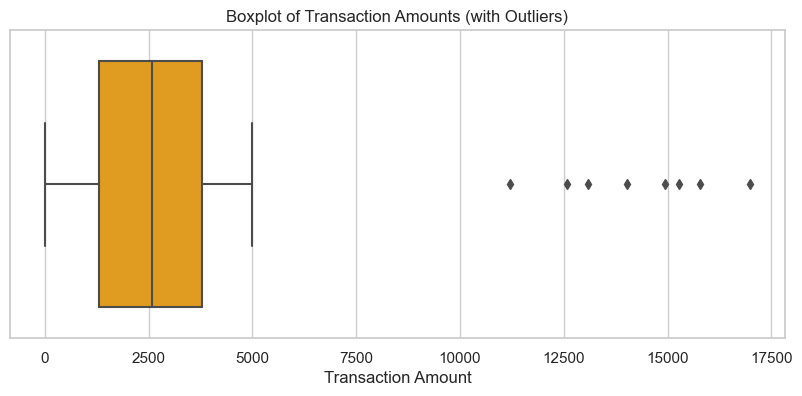

In [99]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_full, x='amount', color='orange')
plt.title("Boxplot of Transaction Amounts (with Outliers)")
plt.xlabel("Transaction Amount")
plt.show()


In [103]:
outliers['branch_name'].value_counts()


branch_name
AXIS 707 Brigade Road      3
CANARA 707 Brigade Road    1
INDUS 123 MG Road          1
HDFC 303 Banjara Hills     1
INDUS 33 Central Park      1
ICICI 55 Info Park         1
Name: count, dtype: int64

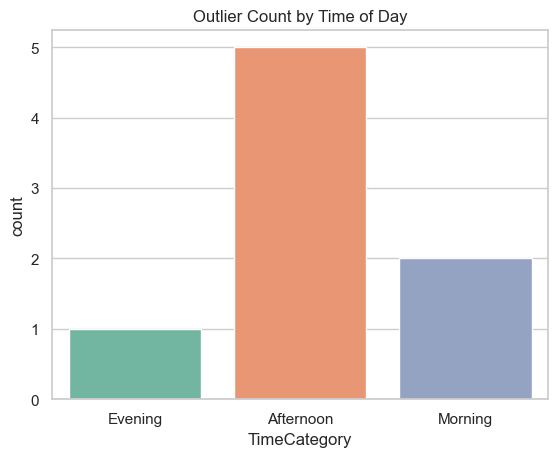

In [102]:
sns.countplot(data=outliers, x='TimeCategory', palette='Set2')
plt.title("Outlier Count by Time of Day")
plt.show()


In [104]:
high_value_customers = outliers['customer_id'].value_counts().head(10)
print("Top Customers with Most Outliers:")
print(high_value_customers)


Top Customers with Most Outliers:
customer_id
53    2
8     1
13    1
80    1
5     1
43    1
22    1
Name: count, dtype: int64
